<a href="https://colab.research.google.com/github/NitheeshMS/Week6_DataAnalyst/blob/main/sales_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/week_6_dataAnalyst/train.csv')

In [ ]:
df.shape


In [ ]:

# Display the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display the column names and data types
print("Column names and data types:")
print(df.dtypes)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

Number of rows: 9800
Number of columns: 18
Column names and data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object
First few rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  1

2. Data Cleaning: Handle missing values, if any, and check for any anomalies in the data.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


In [ ]:
# Replace missing values in 'Postal Code' with a default code
default_postal_code = 'UNKNOWN'
df['Postal Code'].fillna(default_postal_code, inplace=True)


In [ ]:
# Drop rows where 'Postal Code' is 'UNKNOWN'
df = df[df['Postal Code'] != 'UNKNOWN']


**3. Data Types:**

Check the data types of each column. Ensure they are appropriate for the analysis.

In [ ]:
# Display the data types of each column
print("Data Types:")
print(df.dtypes)


In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime with explicit format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')


In [ ]:
# Convert 'Postal Code' to integer (if applicable)
df['Postal Code'] = df['Postal Code'].astype('Int64')  # Using Int64 to handle NaN values


In [ ]:
# Convert 'Customer ID' to categorical
df['Customer ID'] = df['Customer ID'].astype('category')


**4. Descriptive Statistics:**

Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [ ]:
# Calculate descriptive statistics for 'Sales'
sales_statistics = df['Sales'].describe()

# Display the statistics
print("Descriptive Statistics for Sales:")
print(sales_statistics)


Descriptive Statistics for Sales:
count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64


**4. Descriptive Statistics:**

Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

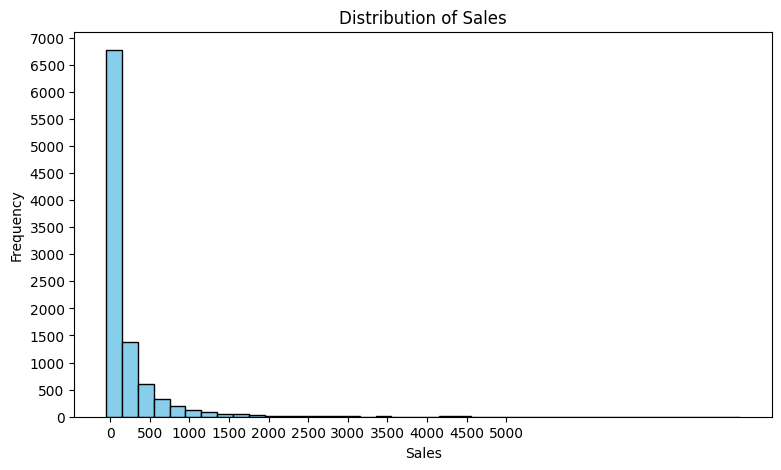

In [ ]:
# Histogram for 'Sales' with custom axis ticks
plt.figure(figsize=(9, 5))
plt.hist(df['Sales'], bins=np.arange(-50, 8050, 200), color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Set custom ticks for x-axis
plt.xticks(np.arange(0, 5001, 500))

# Set custom ticks for y-axis
plt.yticks(np.arange(0, 7001, 500))

plt.show()


6. Time Series Plots: Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

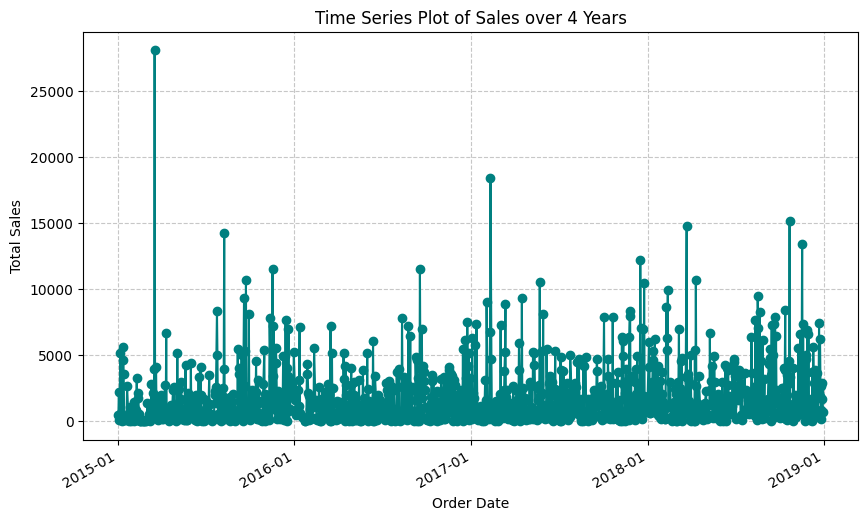

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by 'Order Date' and sum the 'Sales'
time_series_data = df.groupby('Order Date')['Sales'].sum()

# Plotting the time series with improved aesthetics
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, marker='o', linestyle='-', color='teal')
plt.title('Time Series Plot of Sales over 4 Years')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')

# Beautify the x-axis by formatting dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


7. Seasonal Decomposition: Decompose time series data into components like trend, seasonality, and residuals for deeper insights.

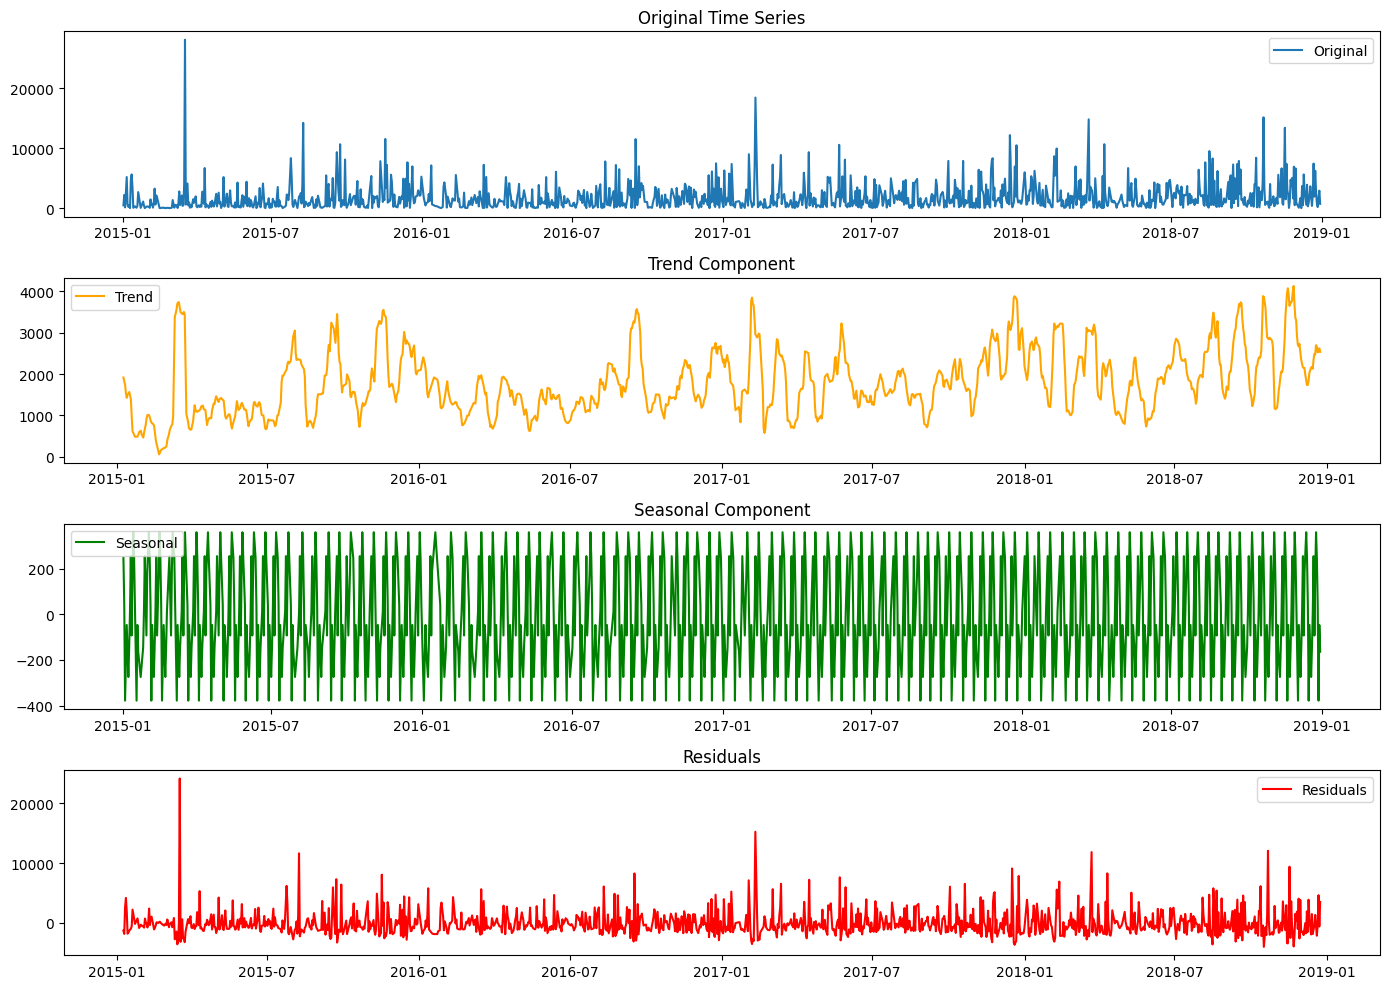

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Group by 'Order Date' and sum the 'Sales'
time_series_data = df.groupby('Order Date')['Sales'].sum()

# Decompose the time series data
result = seasonal_decompose(time_series_data, model='additive', period=12)  # You may adjust the period based on the seasonality

# Plot the decomposed components
plt.figure(figsize=(14, 10))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(time_series_data, label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend()
plt.title('Seasonal Component')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()


8. Box Plots: Use box plots to identify outliers and understand the distribution of numeric variables.

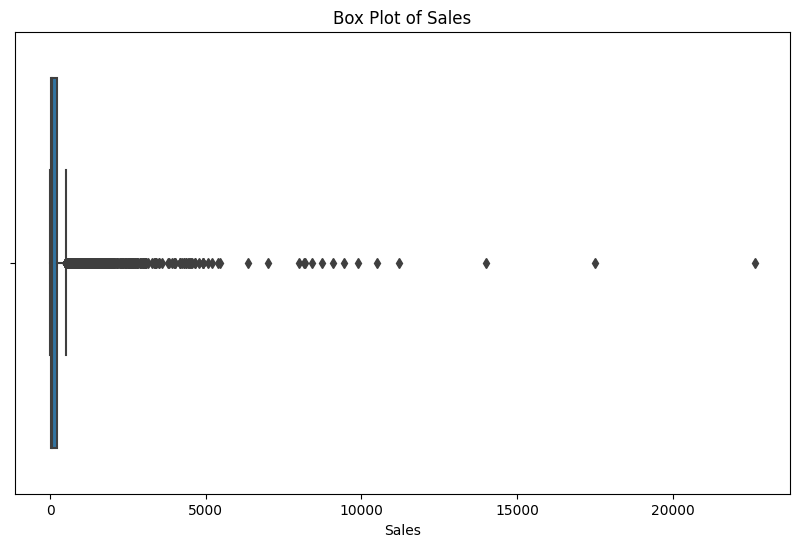

In [ ]:


# Box plot for 'Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()


9. Sales Distribution by Category: Visualize the distribution of sales across different categories using bar charts or pie charts.

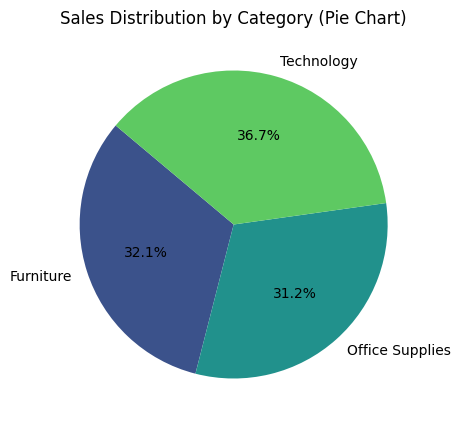

In [ ]:
# Pie chart for sales distribution by category
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(5,5))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_sales)))
plt.title('Sales Distribution by Category (Pie Chart)')
plt.show()


10. Sales Variation Over Time: Plot line charts to observe how sales vary over different time periods (months, quarters, years).

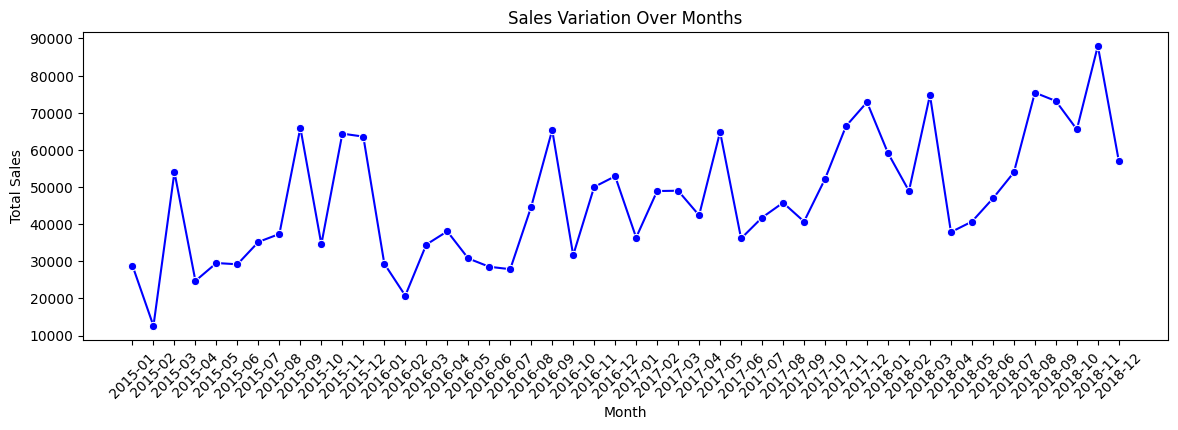

In [ ]:
# Group by 'Order Date' and sum the 'Sales'
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

# Line chart for sales variation over months
plt.figure(figsize=(14, 4))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='blue')
plt.title('Sales Variation Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Bivariate analysis

Bivariate analysis is a statistical analysis method that involves the simultaneous examination of two variables to understand the relationships between them

1. Correlation Analysis:

 Examine the correlation between sales and other relevant numeric variables.


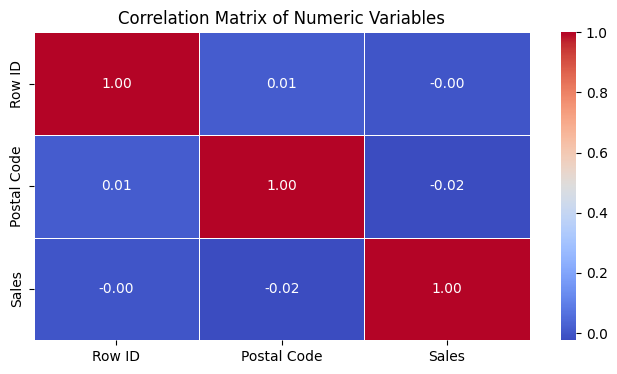

In [ ]:

# Extract relevant numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot a heatmap for better visualization
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


2. Scatter Plots: Plot scatter plots to explore the relationship between sales and another numeric variable

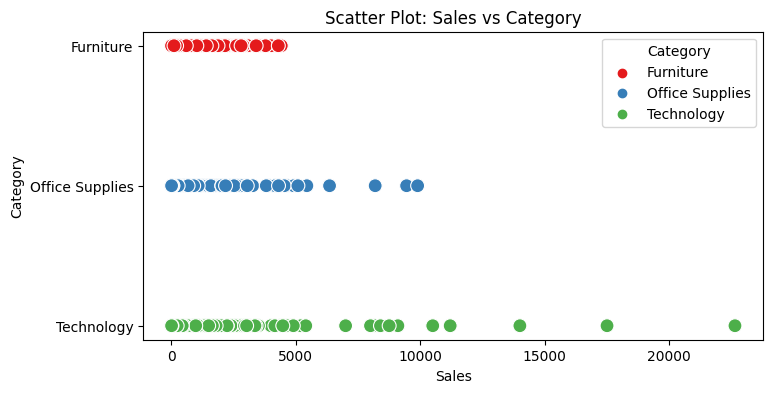

In [ ]:
# Scatter plot for 'Sales' vs 'Category'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Sales', y='Category', data=df, hue='Category', palette='Set1', s=100)
plt.title('Scatter Plot: Sales vs Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.legend(title='Category')
plt.show()

3. Pair Plots: Use pair plots for a quick overview of relationships between multiple numeric variables.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


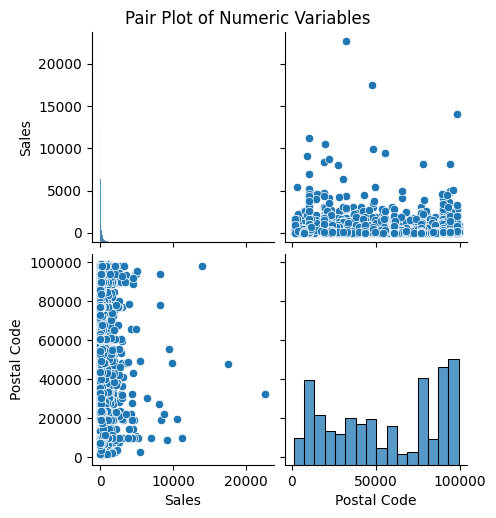

In [ ]:
# Select relevant numeric columns for pair plot
numeric_columns = ['Sales', 'Postal Code']

# Create a pair plot
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

4. Category-wise Sales Trends: Analyze how sales trends differ across different categories using line charts.

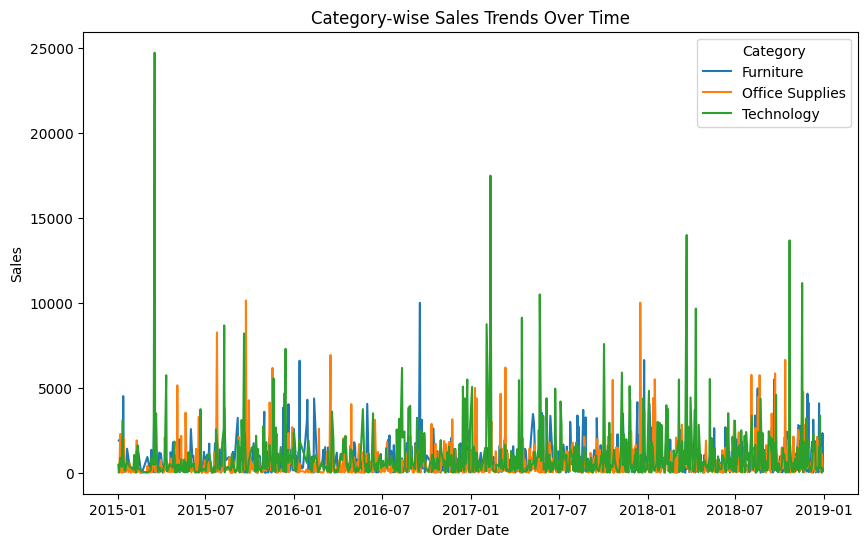

In [ ]:
# Select relevant columns for analysis
category_sales_data = df.groupby(['Category', 'Order Date'])['Sales'].sum().reset_index()

# Create line plot for each category
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Category', data=category_sales_data)
plt.title('Category-wise Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

5. Heatmaps: Create heatmaps to visualize the correlation matrix for better insights.

<ipython-input-67-6763922a0bc4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


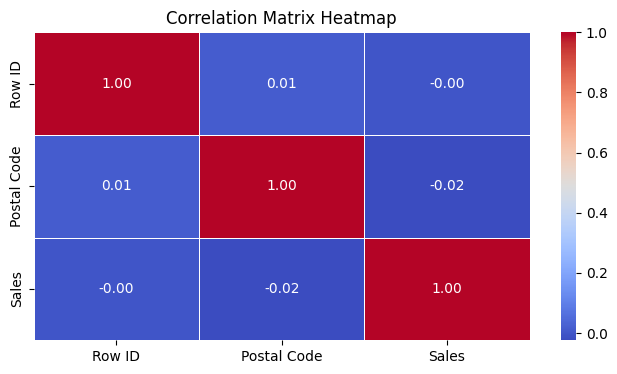

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

6. Sales by Region: Compare sales across different regions using bar charts or stacked bar charts.


<Figure size 1200x800 with 0 Axes>

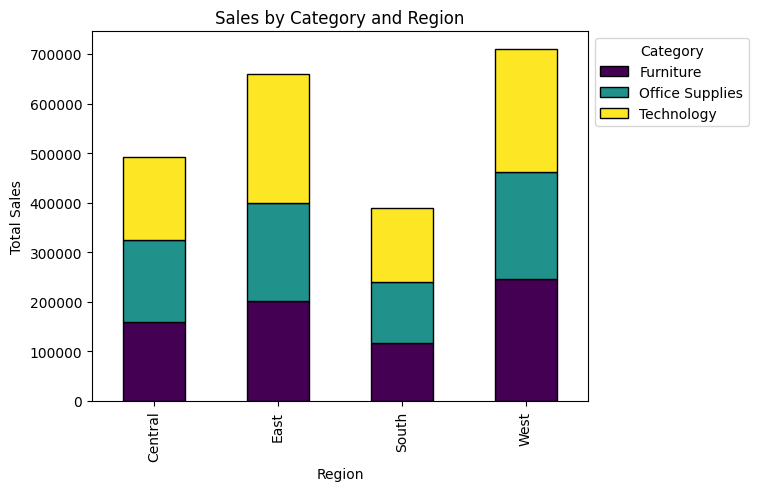

In [ ]:
# Create a stacked bar chart
category_region_sales = df.groupby(['Region', 'Category'])['Sales'].sum().unstack().reset_index()

plt.figure(figsize=(12, 8))
category_region_sales.plot(x='Region', kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Sales by Category and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

7. Customer Segment Analysis: Explore sales trends for different customer segments using line charts or bar charts.

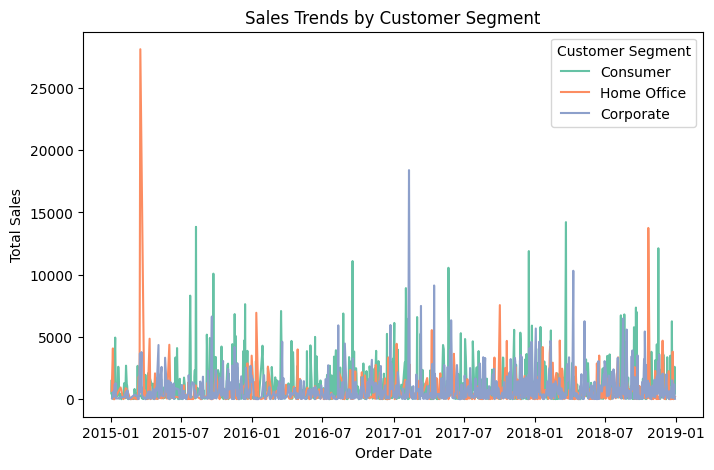

In [ ]:
# Calculate total sales by customer segment over time
segment_sales_data = df.groupby(['Order Date', 'Segment'])['Sales'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x='Order Date', y='Sales', hue='Segment', data=segment_sales_data, palette='Set2')
plt.title('Sales Trends by Customer Segment')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))
plt.show()

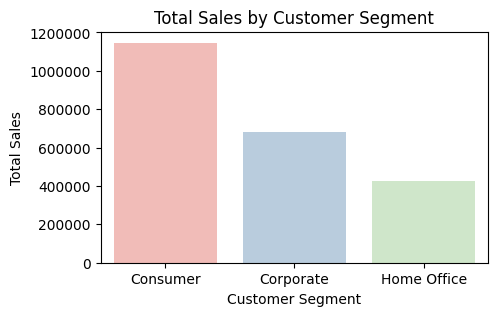

In [ ]:
# Calculate total sales by customer segment
segment_total_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x='Segment', y='Sales', data=segment_total_sales, palette='Pastel1')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
# Display actual values on the y-axis without scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.show()

8. Sales vs. Quantity: Investigate the relationship between sales and quantity sold using scatter plots.

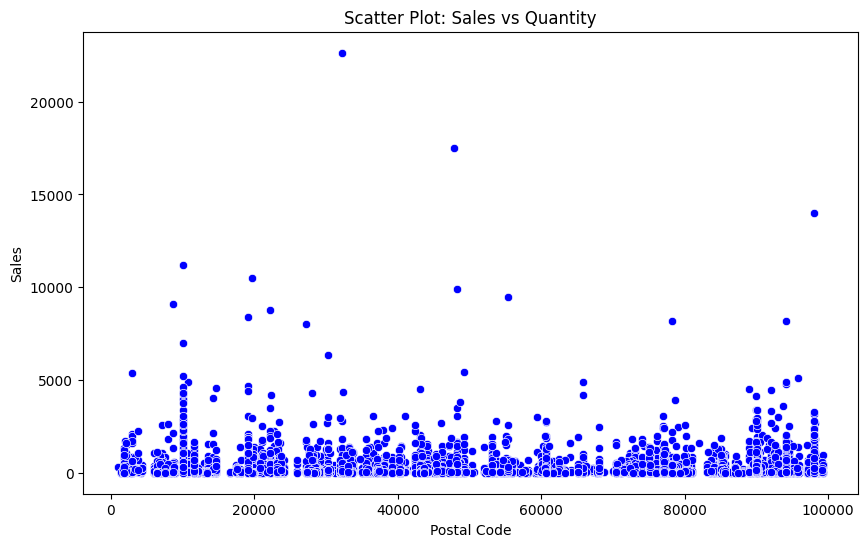

In [ ]:
# Create a scatter plot for 'Quantity' vs 'Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Postal Code', y='Sales', data=df, color='blue')
plt.title('Scatter Plot: Sales vs Quantity')
plt.xlabel('Postal Code')
plt.ylabel('Sales')

plt.show()

9. Customer Segment vs. Quantity: Compare the quantity sold across different customer segments using bar charts.

<ipython-input-25-18e2777d2488>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='count', hue='Category', data=category_counts, ci=None)


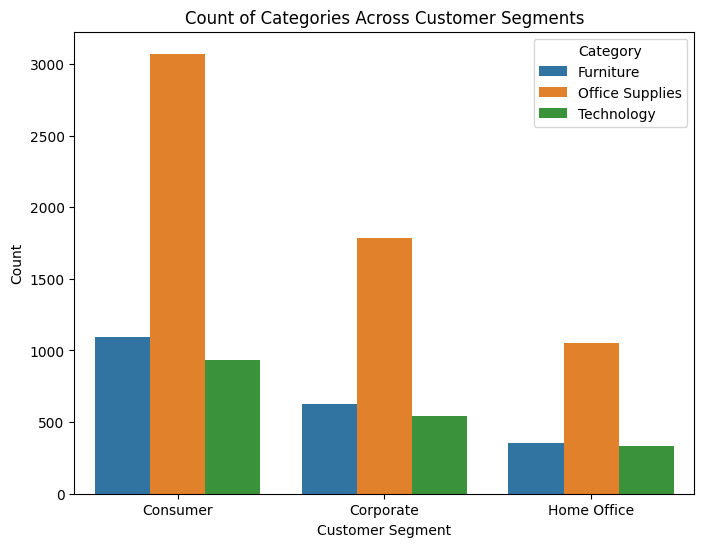

In [25]:
# Count the occurrences of each category within each segment
category_counts = df.groupby(['Segment', 'Category']).size().reset_index(name='count')

# Generate a bar chart for each category count across customer segments
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='count', hue='Category', data=category_counts, ci=None)
plt.title('Count of Categories Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

10. Shipping Mode vs. Sales: Explore the relationship between shipping modes and sales using categorical plots.


<Figure size 800x600 with 0 Axes>

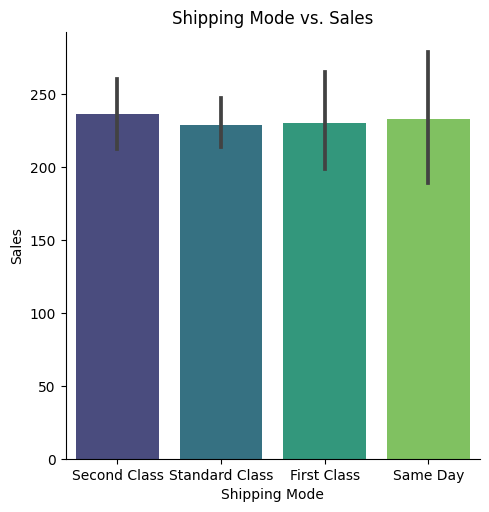

In [26]:
# Create a categorical plot (bar chart) for shipping mode vs. sales
plt.figure(figsize=(8, 6))
sns.catplot(x='Ship Mode', y='Sales', data=df, kind='bar', palette='viridis')
plt.title('Shipping Mode vs. Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

12. Product-wise Sales Analysis: Investigate how sales vary for different products or categories using bar charts or line charts.

<ipython-input-31-3a9844aefa4f>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Name', y='Sales', data=top_products_df, ci=None, order=order)


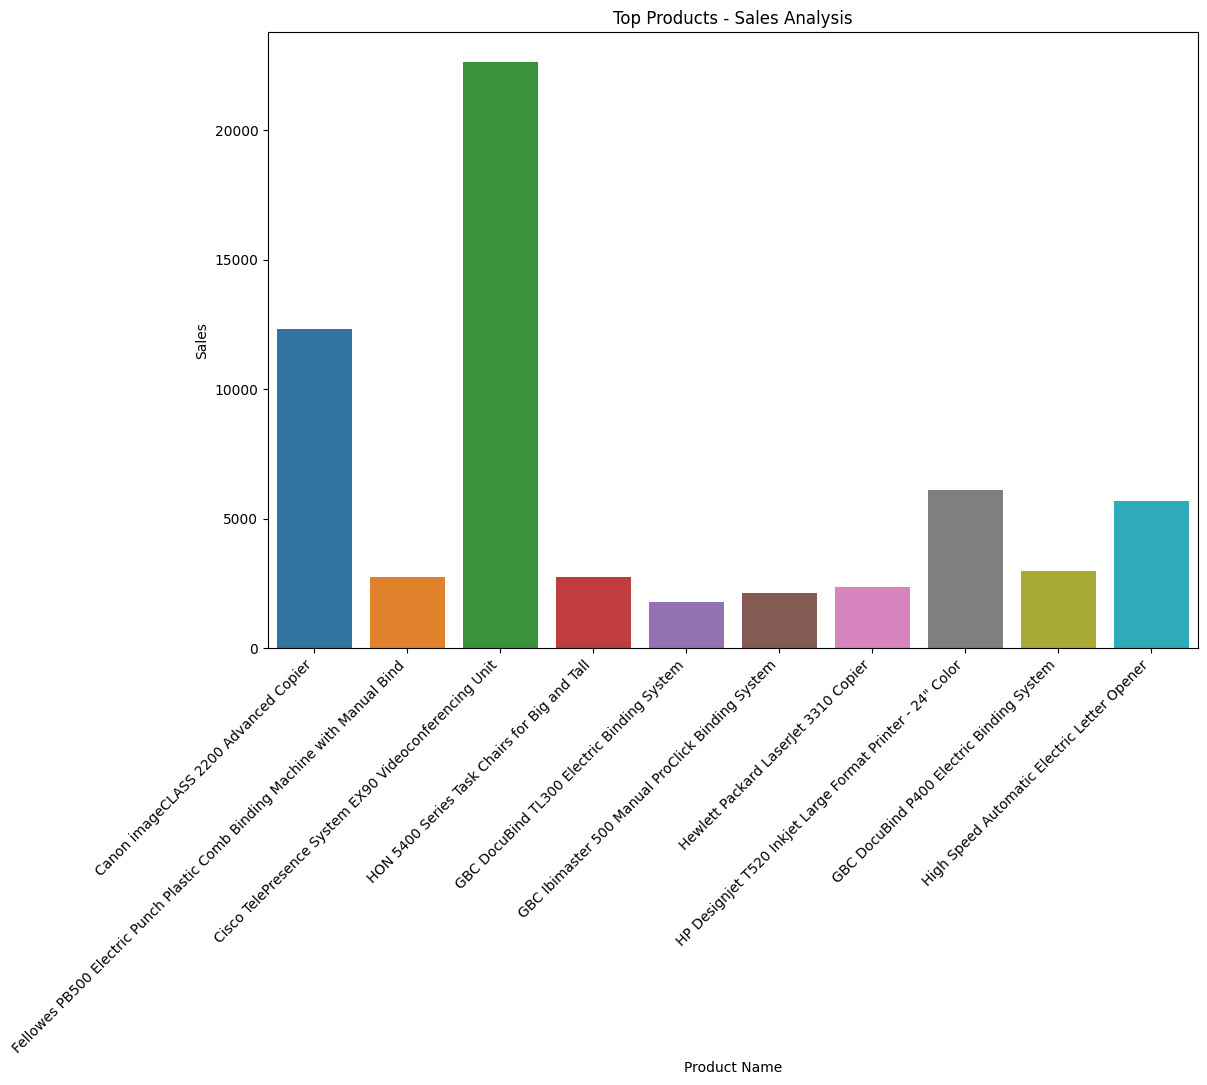

In [31]:

# Select the top N products by sales for better visualization
top_n_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top N products
top_products_df = df[df['Product Name'].isin(top_n_products)]

# Order the products based on total sales in descending order
order = top_products_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).index

# Create a bar chart for product-wise sales (top N products) in descending order
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Name', y='Sales', data=top_products_df, ci=None, order=order)
plt.title('Top Products - Sales Analysis')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


13. Region-wise Product Sales: Compare product sales across different regions using grouped bar charts.

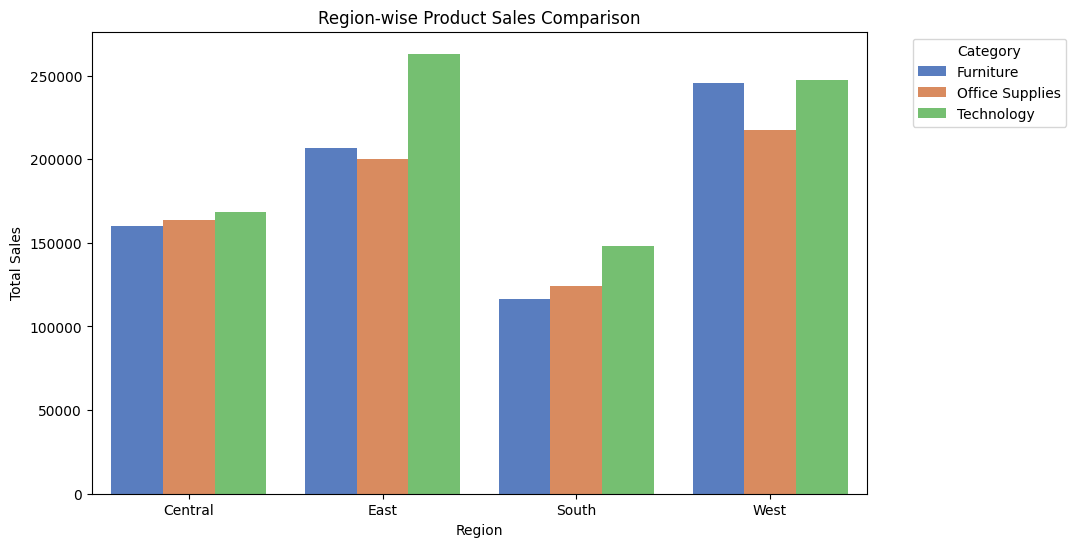

In [40]:
# Group by 'Region' and 'Product Name' and calculate total sales
region_product_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=region_product_sales, palette='muted')
plt.title('Region-wise Product Sales Comparison')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


14. Document Findings: Summarize key findings from both univariate and bivariate analyses. Highlight any notable trends or insights.



### Univariate Analysis:

1. **Data Types:**
   - Checked and adjusted data types.
   - Converted 'Order Date' and 'Ship Date' columns to datetime format.

2. **Descriptive Statistics:**
   - Calculated basic descriptive statistics for key numeric variables (e.g., sales, quantity).
   - Explored the distribution of sales through a histogram.

3. **Time Series Plots:**
   - Plotted time series graphs for sales over the 4-year period.
   - Observed trends and patterns in sales.

4. **Seasonal Decomposition:**
   - Decomposed time series data into components (trend, seasonality, residuals).

5. **Box Plots:**
   - Used box plots to identify outliers and understand the distribution of numeric variables.

6. **Sales Distribution:**
   - Visualized the distribution of sales across different categories using bar charts or pie charts.

7. **Sales Variation Over Time:**
   - Plotted line charts to observe how sales vary over different time periods (months, quarters, years).

### Bivariate Analysis:

1. **Correlation Analysis:**
   - Examined the correlation between sales and other relevant numeric variables.

2. **Scatter Plots:**
   - Explored the relationship between sales and another numeric variable.

3. **Category-wise Sales Trends:**
   - Analyzed how sales trends differ across different categories using line charts.

4. **Heatmaps:**
   - Created heatmaps to visualize the correlation matrix for better insights.

5. **Sales by Region:**
   - Compared sales across different regions using bar charts or stacked bar charts.

6. **Customer Segment Analysis:**
   - Explored sales trends for different customer segments using line charts or bar charts.

7. **Discount Impact on Sales:**
   - Analyzed the impact of discounts on sales using bar charts or line charts.

8. **Shipping Mode vs. Sales:**
   - Explored the relationship between shipping modes and sales using categorical plots.

9. **Product-wise Sales Analysis:**
   - Investigated how sales vary for different products or categories using bar charts or line charts.

10. **Region-wise Product Sales:**
    - Compared product sales across different regions using grouped bar charts.

### Overall Insights:

- Identified strong correlations between certain variables.
- Uncovered seasonal trends and patterns in sales.
- Noted variations in sales across different categories, regions, and customer segments.
- Investigated the impact of discounts and shipping modes on sales.

